In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load your sales data
OrderData = pd.read_csv('C:/Users/wasim/OneDrive/Desktop/MySQL/Data Analysis/AceOrders2324.csv')
print(OrderData.head())

   Order Number Order Status        Order Date First Name (Billing)  \
0         14132   Processing  2024-09-30 18:13            Christine   
1         14131   Processing  2024-09-30 17:58              Jessica   
2         14119   Processing  2024-09-30 15:22               Dessie   
3         14075   Processing  2024-09-29 02:42                  Joy   
4         14073   Processing  2024-09-28 15:50              allyssa   

  Last Name (Billing)             Company (Billing)  \
0             Sanchez  Sanchez Here Productions LLC   
1              Mobley           DESIGN 2 WEAR 2 LLC   
2               Coder                Cheer Bows Etc   
3              Ridley                 J&J Creations   
4              Travis                           NaN   

             Address 1&2 (Billing) City (Billing) State Code (Billing)  \
0                 5150 Marton Road      Ann Arbor                   MI   
1                 1112 Central Ave     Middletown                   OH   
2  400 Colemans Cros

In [3]:
# Convert 'Order Date' to DateTime
OrderData['Order Date'] = pd.to_datetime(OrderData['Order Date'])

In [4]:
# Extract year, month, and week
OrderData['Year'] = OrderData['Order Date'].dt.year
OrderData['Month'] = OrderData['Order Date'].dt.month
OrderData['Week'] = OrderData['Order Date'].dt.isocalendar().week


In [5]:
# Filter sales for 2023 and 2024
sales_2023 = OrderData[OrderData['Year'] == 2023]
sales_2024 = OrderData[OrderData['Year'] == 2024]

# Calculate total sales
total_sales_2023 = sales_2023['Order Total Amount'].sum()
total_sales_2024 = sales_2024['Order Total Amount'].sum()

print("Total Sales 2023:", total_sales_2023)
print("Total Sales 2024:", total_sales_2024)

Total Sales 2023: 46696.74
Total Sales 2024: 85135.29000000001


In [6]:
monthly_sales_2023 = sales_2023.groupby('Month')['Order Total Amount'].sum()
monthly_sales_2024 = sales_2024.groupby('Month')['Order Total Amount'].sum()

print("Monthly Sales 2023:\n", monthly_sales_2023)
print("Monthly Sales 2024:\n", monthly_sales_2024)


Monthly Sales 2023:
 Month
7      5358.34
8     13456.52
9      7733.91
10     9254.18
11     6900.46
12     3993.33
Name: Order Total Amount, dtype: float64
Monthly Sales 2024:
 Month
1     5991.14
2     6680.06
3     6282.87
4    12702.70
5     8690.01
6    11099.56
7     8809.39
8    12848.59
9    12030.97
Name: Order Total Amount, dtype: float64


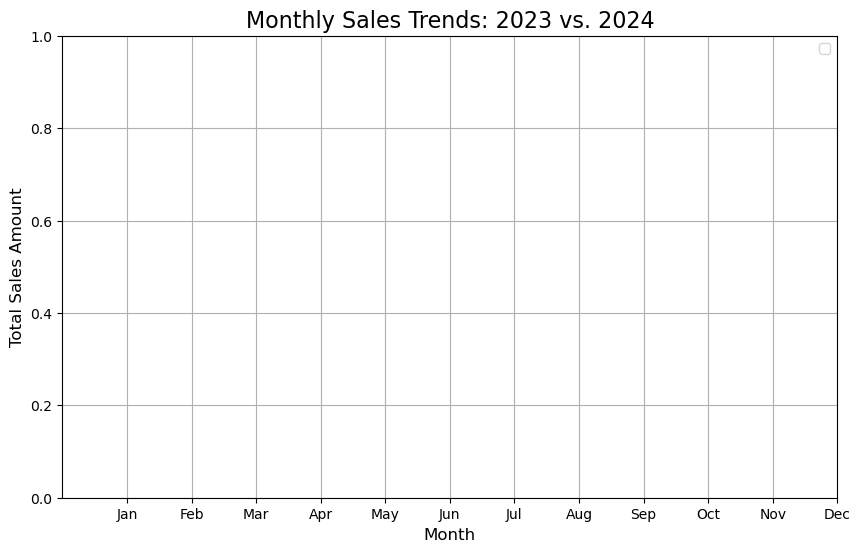

In [7]:
# Group data by year and month for sales trends
monthly_sales = OrderData.groupby(['Year', 'Month'])['Order Total Amount'].sum().unstack(level=0)

# Plotting the line chart
plt.figure(figsize=(10,6))
sns.lineplot(OrderData=monthly_sales)
plt.title('Monthly Sales Trends: 2023 vs. 2024', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['2023', '2024'])
plt.grid(True)
plt.show()


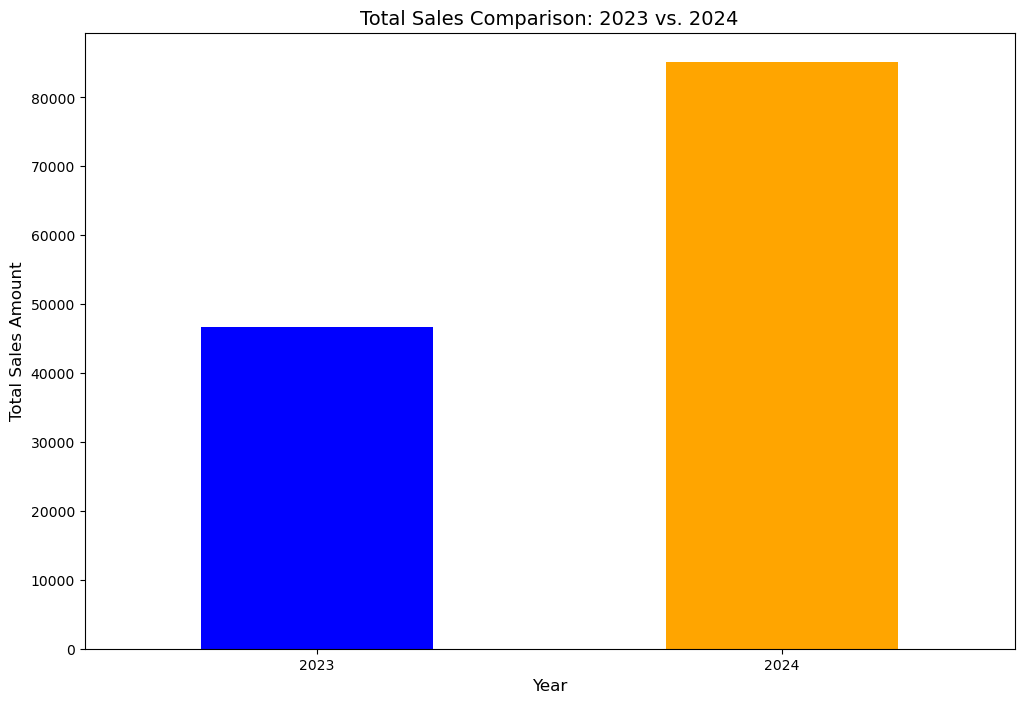

In [8]:
# Calculate total sales per year
total_sales_per_year = OrderData.groupby('Year')['Order Total Amount'].sum()

# Plotting the bar chart
plt.figure(figsize=(12,8))
total_sales_per_year.plot(kind='bar', color=['blue', 'orange'])
plt.title('Total Sales Comparison: 2023 vs. 2024', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=0)
plt.show()


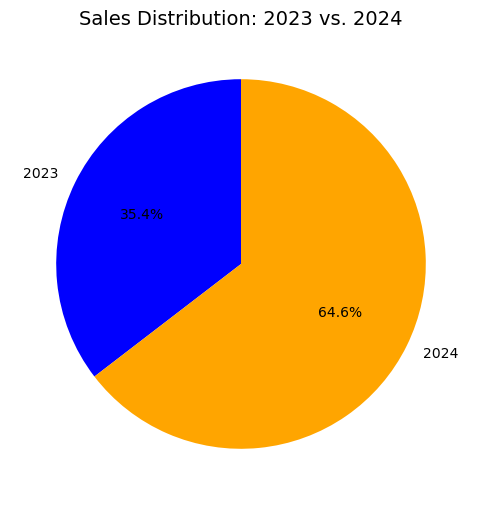

In [9]:
# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(total_sales_per_year, labels=total_sales_per_year.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title('Sales Distribution: 2023 vs. 2024', fontsize=14)
plt.show()


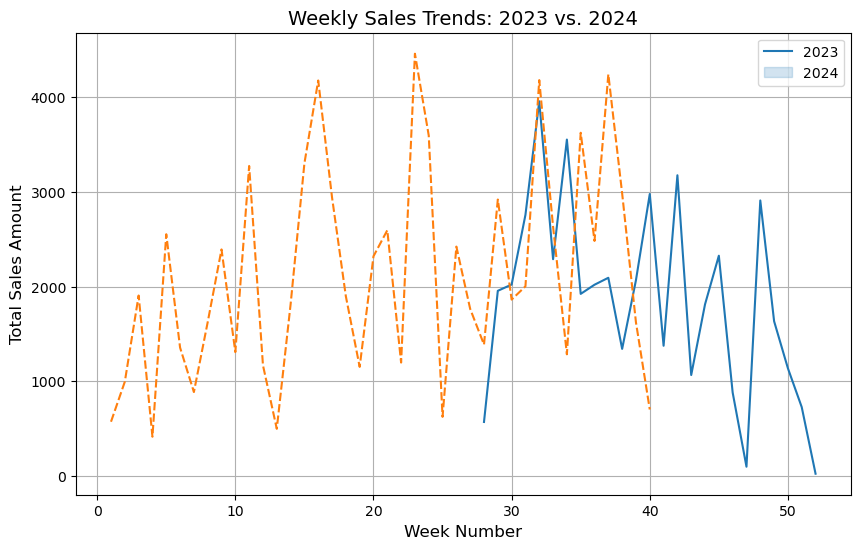

In [10]:
# Group data by year and week for sales trends
weekly_sales = OrderData.groupby(['Year', 'Week'])['Order Total Amount'].sum().unstack(level=0)

# Plotting the line chart for weekly sales
plt.figure(figsize=(10,6))
sns.lineplot(data=weekly_sales)
plt.title('Weekly Sales Trends: 2023 vs. 2024', fontsize=14)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.legend(['2023', '2024'])
plt.grid(True)
plt.show()


In [11]:
# Load your sales data
OrderData1 = pd.read_csv('C:/Users/wasim/OneDrive/Desktop/MySQL/Data Analysis/Orders2324.csv')
print(OrderData1.head())

   Order Number Order Status        Order Date First Name (Billing)  \
0         14132   Processing  2024-09-30 18:13            Christine   
1         14132   Processing  2024-09-30 18:13            Christine   
2         14132   Processing  2024-09-30 18:13            Christine   
3         14132   Processing  2024-09-30 18:13            Christine   
4         14131   Processing  2024-09-30 17:58              Jessica   

  Last Name (Billing)             Company (Billing) Address 1&2 (Billing)  \
0             Sanchez  Sanchez Here Productions LLC      5150 Marton Road   
1             Sanchez  Sanchez Here Productions LLC      5150 Marton Road   
2             Sanchez  Sanchez Here Productions LLC      5150 Marton Road   
3             Sanchez  Sanchez Here Productions LLC      5150 Marton Road   
4              Mobley           DESIGN 2 WEAR 2 LLC      1112 Central Ave   

  City (Billing) State Code (Billing) Postcode (Billing)  ...  \
0      Ann Arbor                   MI        

In [12]:
# Group by Category and calculate the total sales per category
best_selling_categories = OrderData1.groupby('Category')['Order Total Amount'].sum().sort_values(ascending=False)

# Display the top 10 best-selling categories
best_selling_categories.head(10)


Category
Adhesive Powder for DTF &amp; Plastisol Transfers,DTF &amp; Transfer Films/Adhesives,DTF/Plastisol Adhesive Powder    37341.30
Easyweed HTV 12" Yard,Heat Transfer Vinyl,HTV Yard                                                                    31296.47
Easyweed HTV 15" Yard,Heat Transfer Vinyl,HTV Yard                                                                    25836.64
Ink,Triangle Plastisol Multi-Purpose Ink                                                                              11999.57
Ink,Triangle Plastisol Inks High Opacity/Bleed Resistant Ink                                                           9401.44
Emulsion,Screen Printing Chemicals,Textil PV                                                                           7998.42
Alum. 23"x31" Screen,Screens                                                                                           7468.14
EasyWeed® Glitter HTV 20" Yard,Heat Transfer Vinyl,HTV Yard                                           

In [13]:
# Group by Product Name and calculate the total sales per product
best_selling_products = OrderData1.groupby('Product Name')['Order Total Amount'].sum().sort_values(ascending=False)

# Display the top 10 best-selling products
best_selling_products.head(10)


Product Name
Adhesive Powder for DTF Transfers - 44 Lb. Barrel           27611.90
EasyWeed® HTV 15" WHITE Yard                                 9157.22
Textil PV - Photopolymer Emulsion - 1 Gallon                 7998.42
EasyWeed®  HTV 12" WHITE Yard                                6036.08
Triangle 1701 PHOENIX WHITE - Gallon                         6022.25
EasyWeed® HTV 15" BLACK Yard                                 5629.02
Easisolv 701N Screen Wash &amp; Stain Remover - 1 Gallon     5486.14
EasyWeed®  HTV 12" BLACK Yard                                4810.25
Adhesive Powder for DTF Transfers - Gallon Size              4564.97
DTF Film Roll 24” x 328'                                     4455.00
Name: Order Total Amount, dtype: float64

In [14]:
# Check for duplicate rows based on Order Number or another unique identifier
duplicates = OrderData1[OrderData1.duplicated(subset='Order Number', keep=False)]

# Display duplicates, if any
print(duplicates)

# Remove duplicates (if you decide to remove them)
OrderData1 = OrderData1.drop_duplicates(subset='Order Number', keep='first')


      Order Number Order Status        Order Date First Name (Billing)  \
0            14132   Processing  2024-09-30 18:13            Christine   
1            14132   Processing  2024-09-30 18:13            Christine   
2            14132   Processing  2024-09-30 18:13            Christine   
3            14132   Processing  2024-09-30 18:13            Christine   
4            14131   Processing  2024-09-30 17:58              Jessica   
...            ...          ...               ...                  ...   
1605          6591    Completed  2023-07-12 18:31                SCOTT   
1606          6591    Completed  2023-07-12 18:31                SCOTT   
1607          6591    Completed  2023-07-12 18:31                SCOTT   
1608          6590    Completed  2023-07-12 17:27                  Dev   
1609          6590    Completed  2023-07-12 17:27                  Dev   

     Last Name (Billing)             Company (Billing)  Address 1&2 (Billing)  \
0                Sanchez  Sanc

In [15]:
# Check the date range of the orders
OrderData1['Order Date'] = pd.to_datetime(OrderData1['Order Date'])
print(OrderData1['Order Date'].min(), OrderData1['Order Date'].max())


2023-07-12 17:27:00 2024-09-30 18:13:00


In [16]:
print(OrderData1.columns)


Index(['Order Number', 'Order Status', 'Order Date', 'First Name (Billing)',
       'Last Name (Billing)', 'Company (Billing)', 'Address 1&2 (Billing)',
       'City (Billing)', 'State Code (Billing)', 'Postcode (Billing)',
       'Country Code (Billing)', 'Email (Billing)', 'Phone (Billing)',
       'First Name (Shipping)', 'Last Name (Shipping)',
       'Address 1&2 (Shipping)', 'City (Shipping)', 'State Code (Shipping)',
       'Postcode (Shipping)', 'Country Code (Shipping)',
       'Payment Method Title', 'Category', 'Product Name',
       'Cart Discount Amount', 'Order Subtotal Amount',
       'Shipping Method Title', 'Order Shipping Amount', 'Order Refund Amount',
       'Order Total Amount', 'Order Total Tax Amount', 'Discount Amount'],
      dtype='object')


In [17]:
# Find orders present in the new dataset but not in the old dataset
new_orders = set(OrderData1['Order Number']) - set(OrderData['Order Number'])
print("New orders added:", len(new_orders))


New orders added: 0


In [18]:
# Check for refund or discount columns
print(OrderData1[['Order Refund Amount', 'Discount Amount']].head())

# Ensure you're calculating totals correctly by accounting for refunds/discounts
OrderData1['Net Sales'] = OrderData1['Order Total Amount'] - OrderData1['Order Refund Amount'] - OrderData1['Discount Amount']


    Order Refund Amount  Discount Amount
0                   0.0              NaN
4                   0.0             75.0
6                   0.0             99.0
11                  0.0             50.0
12                  0.0              NaN


In [29]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load your data (assuming you have already loaded it into a DataFrame called df)
OrderData1 = pd.read_csv('C:/Users/wasim/OneDrive/Desktop/MySQL/Data Analysis/Orders2324.csv')

In [33]:
# Explore data
print(OrderData1.head())  # Show first few rows
print(OrderData1.info())  # Check data types and missing values
print(OrderData1.describe())  # Statistical summary

# Handle missing values if necessary
OrderData1 = OrderData1.dropna(subset=['Product Name', 'Order Total Amount'])  # Remove rows with missing values in these columns


   Order Number Order Status          Order Date First Name (Billing)  \
0         14132   Processing 2024-09-30 18:13:00            Christine   
1         14132   Processing 2024-09-30 18:13:00            Christine   
2         14132   Processing 2024-09-30 18:13:00            Christine   
3         14132   Processing 2024-09-30 18:13:00            Christine   
4         14131   Processing 2024-09-30 17:58:00              Jessica   

  Last Name (Billing)             Company (Billing) Address 1&2 (Billing)  \
0             Sanchez  Sanchez Here Productions LLC      5150 Marton Road   
1             Sanchez  Sanchez Here Productions LLC      5150 Marton Road   
2             Sanchez  Sanchez Here Productions LLC      5150 Marton Road   
3             Sanchez  Sanchez Here Productions LLC      5150 Marton Road   
4              Mobley           DESIGN 2 WEAR 2 LLC      1112 Central Ave   

  City (Billing) State Code (Billing) Postcode (Billing)  ...  \
0      Ann Arbor                 

In [37]:
# Feature Engineering
# Convert 'Order Date' to datetime type and extract Year, Month, Day, Weekday
OrderData1['Order Date'] = pd.to_datetime(OrderData1['Order Date'])
OrderData1['Year'] = OrderData1['Order Date'].dt.year
OrderData1['Month'] = OrderData1['Order Date'].dt.month
OrderData1['Day'] = OrderData1['Order Date'].dt.day
OrderData1['Weekday'] = OrderData1['Order Date'].dt.weekday

# Convert categorical features (e.g., Category, Payment Method Title) to numeric using LabelEncoder
label_encoder = LabelEncoder()
OrderData1['Category'] = label_encoder.fit_transform(OrderData1['Category'])
OrderData1['Payment Method Title'] = label_encoder.fit_transform(OrderData1['Payment Method Title'])


In [41]:
# Define features (X) and target variable (y)
X = OrderData1[['Year', 'Month', 'Day', 'Weekday', 'Category', 'Payment Method Title']]  # Features
y = OrderData1['Order Total Amount']  # Target variable (what we want to predict)


In [45]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [51]:
# Make predictions for training and testing sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [55]:
# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Train R²: {r2_train}")
print(f"Test R²: {r2_test}")


Train MAE: 139.83048164854748
Test MAE: 141.89190785928577
Train MSE: 43665.3841337104
Test MSE: 58416.01613157093
Train R²: 0.031856083986381734
Test R²: 0.042581658001108025


In [81]:
# Future prediction example
future_data = pd.DataFrame({
    'Year': [2025],
    'Month': [10],
    'Day': [15],
    'Weekday': [3],  # Wednesday
    'Category': [label_encoder.transform(['10'])[0]],
    'Payment Method Title': [label_encoder.transform(['100'])[0]]
})

future_prediction = model.predict(future_data)
print(f"Predicted Order Total for future data: ${future_prediction[0]}")


Predicted Order Total for future data: $298.6836293396482


In [93]:
# Check the categories that were encoded
# print(label_encoder.classes_)

# Check the unique values in the 'Category' column
unique_categories = OrderData['Category'].unique()
print("Unique Categories:", unique_categories)




KeyError: 'Category'